In [6]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
%matplotlib inline

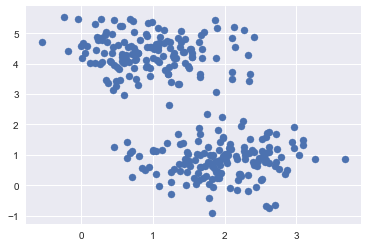

In [11]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true=make_blobs(n_samples=300,centers=2,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [12]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=7)
kmeans.fit(X)
y_means=kmeans.predict(X)

In [13]:
y_means

array([1, 6, 1, 6, 1, 5, 6, 1, 6, 6, 0, 2, 0, 1, 1, 4, 5, 1, 4, 2, 6, 1,
       2, 2, 0, 0, 2, 6, 4, 3, 6, 1, 2, 1, 4, 6, 4, 6, 1, 1, 6, 3, 5, 6,
       3, 3, 6, 6, 4, 6, 4, 0, 4, 4, 6, 3, 3, 0, 0, 2, 6, 4, 3, 6, 0, 3,
       3, 4, 2, 2, 4, 6, 6, 2, 0, 3, 1, 6, 1, 1, 6, 1, 0, 3, 2, 1, 0, 4,
       2, 3, 0, 6, 0, 1, 6, 5, 6, 6, 2, 4, 4, 1, 1, 2, 3, 4, 1, 4, 2, 5,
       4, 1, 3, 0, 2, 5, 1, 4, 3, 4, 6, 6, 5, 5, 4, 2, 0, 4, 6, 6, 4, 2,
       0, 4, 6, 6, 2, 6, 4, 0, 2, 0, 3, 0, 6, 2, 4, 0, 0, 3, 4, 3, 2, 0,
       6, 6, 3, 3, 0, 2, 2, 3, 1, 0, 1, 1, 3, 2, 4, 1, 5, 6, 0, 1, 3, 1,
       2, 5, 4, 0, 1, 1, 1, 1, 4, 6, 1, 6, 2, 5, 4, 6, 4, 2, 4, 4, 1, 0,
       2, 6, 1, 0, 4, 6, 5, 4, 2, 6, 2, 2, 5, 6, 4, 3, 3, 2, 6, 1, 1, 0,
       2, 0, 1, 4, 3, 5, 6, 3, 2, 4, 5, 1, 4, 6, 6, 3, 2, 2, 0, 4, 6, 6,
       4, 6, 3, 6, 1, 3, 4, 4, 6, 3, 3, 4, 5, 1, 0, 2, 6, 4, 5, 4, 1, 5,
       1, 0, 6, 3, 1, 2, 3, 2, 6, 6, 2, 2, 2, 1, 5, 2, 0, 0, 6, 1, 3, 4,
       6, 0, 2, 2, 3, 4, 6, 3, 6, 6, 2, 4, 0, 5])

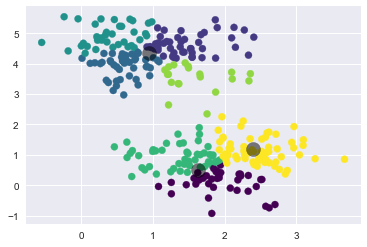

In [14]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X,n_clusters,rseed=2):
    # random clusters
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    
    while True:
        # assign based on closest center
        labels=pairwise_distances_argmin(X,centers)
        
        # find new centers from means of points
        newcenters=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        
        # check for convergence
        if np.all(centers==newcenters):
            break
        centers=newcenters
        
    return centers,labels

centers,labels=find_clusters(X,3)
plt.scatter(X[:,0],X[:,1],c=y_means,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)